# 2.1 load_digits : 손글씨를 분류해 봅시다

## 목차

> <p style="font-size:17px">2-1-1. 필요한 모듈 import하기</p>
  <p style="font-size:17px">2-1-2. 데이터 준비</p> 
  <p style="font-size:17px">2-1-3. 데이터 이해하기</p>
  <p style="font-size:17px">2-1-4. train, test 데이터 분리</p>
  <p style="font-size:17px">2-1-5. 다양한 모델로 학습시켜보기</p>
  <p style="font-size:17px">2-1-6. 모델을 평가해 보기</p>


## 루브릭 (프로젝트 평가 기준)

> |<p style="font-size:15px"> 평가문항 </p>                                |<p style="font-size:15px"> 상세기준 </p>        |
  |------------------------------------------------------------------------|------------------------------------------------|
  | 1. 3가지 데이터셋의 구성이 합리적으로 진행되었는가?                  |feature와 label 선정을 위한 데이터 분석과정이 체계적으로 전개됨|
  | 2. 3가지 데이터셋에 대해 각각 5가지 모델을 성공적으로 적용하였는가?    |모델학습 및 테스트가 정상적으로 수행되었음      |
  | 3. 3가지 데이터셋에 대해 모델의 평가지표가 적절히 선택되었는가?        |평가지표 선택 및 이유 설명이 타당함             |

# 2-1-1. 필요한 모듈 import 하기
---
* scikit-learn 라이브러리의 dataset 패키지 안에 있는 load_digits을 import 해옵니다.
* scikit-learn 라이브러리의 model_selection 안에 있는 train_test_split을 import 해옵니다.
* scikit-learn 라이브러리의 metrics 안에 있는 classification_report를 import 해옵니다.
* matplotlib 라이브러리의 pyplot을 plt라는 이름으로 가져옵니다.
    * %matplotlib inline 코드를 추가하여 이미지를 현재 화면에 보여줄 수 있도록 합니다.

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

## 2-1-2. 데이터 준비
---
* load_digits()를 digits라는 변수에 지정하여 로딩합니다.

In [2]:
digits = load_digits()

print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


## 2-1-3. 데이터 이해하기
---
* digits에 담겨있는 정보들을 확인하기 위해 keys()라는 메서드를 사용합니다.

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

* 중요한 digits 데이터는 digits_data 변수에 저장한 후 데이터 크기를 확인합니다.
    * 총 1,797개의 데이터가 각각 64개의 숫자 정보를 담고 있는 것으로 보입니다. 

In [4]:
digits_data = digits.data

print(digits_data.shape)

(1797, 64)


* 첫 번째 데이터를 확인 해보겠습니다.

In [5]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

* 손글씨 데이터는 이미지 데이터입니다. 이미지를 간단히 확인 해보겠습니다.

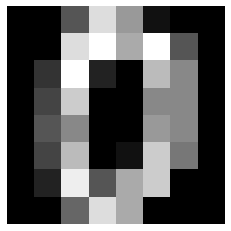

In [6]:
plt.imshow(digits.data[0].reshape(8,8), cmap='gray')
plt.axis('off')
plt.show()

* 여러장의 손글씨 이미지 데이터도 확인 해보겠습니다.

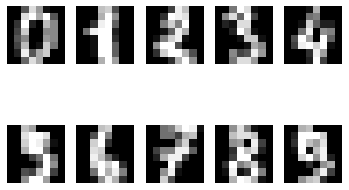

In [7]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8,8), cmap='gray')
    plt.axis('off')
plt.show()

* 이번에는 타겟 데이터를  digits_label 변수에 저장한 후 데이터 크기를 확인하고, 데이터를 확인 해보겠습니다.

In [8]:
digits_label = digits.target
print(digits_label.shape)
digits_label[:10]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

* 라벨의 이름을 다음과 같은 target_names에서 확인 해보겠습니다.

In [9]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

* sklearn 사이트에 나와있는 공식 가이드 문서도 함께 살펴보겠습니다. 
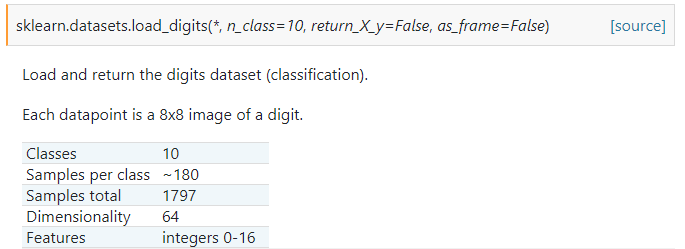
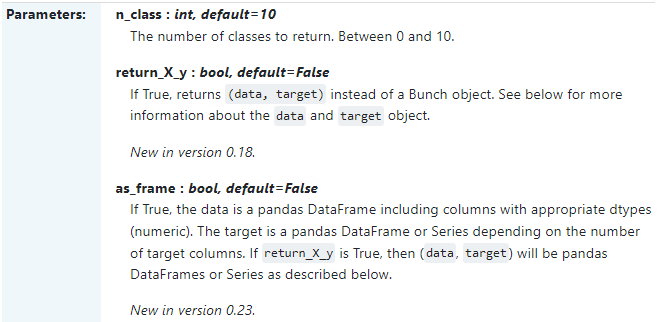
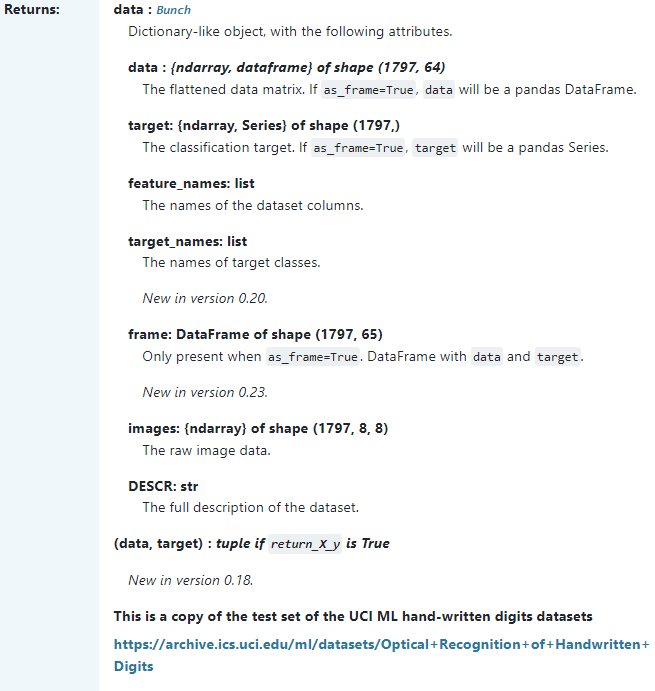
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

## 2-1-4. train, test 데이터 분리
---
* 학습 데이터와 레이블의 크기가 같은지 다시한번 확인합니다.
* 모델 학습을 위한 데이터와 테스트용 정답 데이터를 준비 해보겠습니다.
* 모델 학습 데이터와 테스트용 데이터를 8:2 비율로 나눠주겠습니다.
* random_state는 1이란 숫자를 줘서 나눠지는 데이터를 고정 시켜주겠습니다. 

In [11]:
# 학습 데이터와 레이블의 크기가 같은지 다시한번 확인합니다.
print ('digit_data: ', digits_data.shape)
print ('digit_label: ', digits_label.shape)

digit_data:  (1797, 64)
digit_label:  (1797,)


In [12]:
'''
* 모델 학습 데이터와 테스트용 데이터를 8:2 비율로 나눠주겠습니다.
* random_state는 1이란 숫자를 줘서 나눠지는 데이터를 고정 시켜주겠습니다. 
'''
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=1)

# 학습데이터와 테스트데이터 수를 비교해봅니다. 
print('X_train 데이터 수: ', len(X_train))
print('X_test 데이터 수: ', len(X_test))

X_train 데이터 수:  1437
X_test 데이터 수:  360


## 2-1-5. 다양한 모델로 학습시켜보기
---
* Decision Tree 사용해 보기
* Random Forest 사용해 보기
* SVM 사용해 보기
* SGD Classifier 사용해 보기
* Logistic Regression 사용해 보기

### Decision Tree
---

In [13]:
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train, y_train)
decision_y_pred = decision_tree.predict(X_test)

In [14]:
# confusion_matrix로 decision tree 예측결과 확인
confusion_matrix(y_test, decision_y_pred)

array([[40,  0,  0,  0,  1,  1,  0,  0,  1,  0],
       [ 0, 29,  1,  1,  1,  0,  1,  0,  1,  1],
       [ 0,  0, 30,  2,  0,  2,  1,  0,  0,  1],
       [ 0,  0,  3, 29,  0,  0,  0,  3,  2,  4],
       [ 0,  1,  0,  0, 32,  1,  3,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 29,  0,  0,  0,  1],
       [ 0,  0,  1,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  1,  2,  4,  0,  0, 28,  1,  1],
       [ 0,  0,  0,  2,  0,  1,  0,  1, 25,  0],
       [ 0,  2,  0,  1,  1,  3,  0,  3,  0, 24]])

In [15]:
# classification report로 decision tree 모델 성능평가
print(classification_report(y_test, decision_y_pred))

decision_accuracy = accuracy_score(y_test, decision_y_pred)
decision_accuracy

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.91      0.83      0.87        35
           2       0.83      0.83      0.83        36
           3       0.78      0.71      0.74        41
           4       0.82      0.84      0.83        38
           5       0.78      0.97      0.87        30
           6       0.88      0.97      0.92        37
           7       0.78      0.76      0.77        37
           8       0.83      0.86      0.85        29
           9       0.75      0.71      0.73        34

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.84      0.84      0.84       360



0.8388888888888889

#### Decision Tree 결과

> Decision Tree accuracy = **84%**

**Confusion Matrix**
* confusion matrix를 확인 해보면 숫자 0은 100%의 정답 결과를 보여주고 있고, 숫자 4와 6은 나름 높은 정답 결과를 보여주고 있습니다.
* 1, 2, 3, 5, 7 의 숫자는 어느 정도의 정답 결과를 보여주고 있고, 8과 9는 낮은 정답률을 보여주고 있습니다. 

**Classification Report**
* 숫자 0, 1, 6 만 평균 precision 값 보다 높은 값을 보이고 있습니다. 
* 숫자 0, 4, 5, 6, 8 만 평균 recall 값 보다 높거나 같은 값을 보이고 있습니다. 
* 숫자 0, 1, 5, 6, 8 의 숫자는 평균 f1-score 보다 높은 값은 보이고 있습니다. 

### Random Forest
---

In [16]:
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_train, y_train)
random_y_pred = random_forest.predict(X_test)

In [17]:
confusion_matrix(y_test, random_y_pred)

array([[41,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 28,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 33]])

In [18]:
print(classification_report(y_test, random_y_pred))

random_accuracy = accuracy_score(y_test, random_y_pred)
random_accuracy

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      0.98      0.99        41
           4       0.95      1.00      0.97        38
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.98        29
           9       0.94      0.97      0.96        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



0.9833333333333333

#### Random Forest 결과

> Random Forest accuracy = **98%**

**Confusion Matrix**
* confusion matrix를 확인 해보면 대부분의 숫자들이 정답 결과를 나타대고 있다. 틀린 개수는 많아봐도 2개 정도에 불구했다. 

**Classification Report**
* 숫자 4, 5, 9 만 미세한 차이로 평균 precision 값 보다 낮은 값을 보이고 있습니다. 
* 숫자 0, 7, 8, 9 만 미세한 차이로 평균 recall 값 보다 낮은 값을 보이고 있습니다. 
* 숫자 0, 4, 9 만 미세한 차이로 평균 f1-score 값 보다 낮은 값을 보이고 있습니다. 

### SVM
---

In [19]:
svm_model = svm.SVC(random_state=1)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

In [20]:
confusion_matrix(y_test, svm_y_pred)

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 28,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 33]])

In [21]:
print(classification_report(y_test, svm_y_pred))

svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        38
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.98        29
           9       0.94      0.97      0.96        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



0.9916666666666667

#### SVM 결과

> SVM accuracy = **99%**

**Confusion Matrix**
* confusion matrix를 확인 해보면 숫자 5는 오답 1개, 숫자 9는 오답 2개, 나머지의 숫자는 정답을 맞추었다. 

**Classification Report**
* 숫자 5와 9 만 평균 precision 값 보다 미세하게 낮은 값을 보이고 있습니다. 
* 숫자 7, 8, 9 만 평균 recall 값 보다 미세하게 낮은 값을 보이고 있습니다. 
* 숫자 5, 8, 9 만 평균 f1-score 값 보다 미세하게 낮은 값을 보이고 있습니다. 

### SGD (Stochastic Gradient Descent) Classifier
---

In [22]:
sgd_model = SGDClassifier(random_state=1)
sgd_model.fit(X_train, y_train)
sgd_y_pred = sgd_model.predict(X_test)

In [23]:
confusion_matrix(y_test, sgd_y_pred)

array([[41,  0,  0,  0,  1,  0,  0,  0,  1,  0],
       [ 0, 28,  0,  0,  0,  0,  1,  0,  6,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  3,  1],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  1,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 31]])

In [24]:
print(classification_report(y_test, sgd_y_pred))

sgd_accuracy = accuracy_score(y_test, sgd_y_pred)
sgd_accuracy

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       1.00      0.80      0.89        35
           2       1.00      1.00      1.00        36
           3       1.00      0.90      0.95        41
           4       0.97      1.00      0.99        38
           5       0.94      1.00      0.97        30
           6       0.97      1.00      0.99        37
           7       1.00      0.95      0.97        37
           8       0.68      0.97      0.80        29
           9       0.94      0.91      0.93        34

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.96      0.95      0.95       360



0.9472222222222222

#### SGD 결과

> SGD accuracy = **95%**

**Confusion Matrix**
* confusion matrix를 확인 해보면 숫자 8은 많은 오답을 나타내고 있지만, 나머지의 숫자들은 적은 숫자의 오류 또는 모든 정답을 맞추는 결과를 보여줍니다.  

**Classification Report**
* 숫자 5, 8, 9 만 평균 precision 값 보다 낮은 값을 보이고 있습니다. 
* 숫자 1, 3, 9 만 평균 recall 값 보다 낮은 값을 보이고 있습니다. 
* 숫자 1, 8, 9 만 평균 f1-score 값 보다 낮은 값을 보이고 있습니다. 

### Logistic Regression
---

In [25]:
logistic_model = LogisticRegression(random_state=1)
logistic_model.fit(X_train, y_train)
logistic_y_pred = logistic_model.predict(X_test)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
confusion_matrix(y_test, logistic_y_pred)

array([[42,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0, 28,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  1,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 33]])

In [27]:
print(classification_report(y_test, logistic_y_pred))

logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
logistic_accuracy

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      0.97      0.97        35
           2       1.00      1.00      1.00        36
           3       0.95      0.98      0.96        41
           4       0.93      1.00      0.96        38
           5       0.90      0.93      0.92        30
           6       1.00      1.00      1.00        37
           7       1.00      0.89      0.94        37
           8       0.97      0.97      0.97        29
           9       0.97      0.97      0.97        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



0.9694444444444444

#### Logistic Regression 결과

> Logistic Regression accuracy = **97%**

**Confusion Matrix**
* confusion matrix를 확인 해보면 전체적으로 1개에서 3개의 오류를 보여주고 있거나 만점의 결과를 보여주고 있습니다. 

**Classification Report**
* 숫자 3, 4, 5, 만 평균 precision 값 보다 낮은 값을 보이고 있습니다. 
* 숫자 5 와 7 만 평균 recall 값 보다 낮은 값을 보이고 있습니다. 
* 숫자 3, 4, 5, 7 만 평균 f1-score 값 보다 낮은 값을 보이고 있습니다. 

## 2-1-6. 모델을 평가해 보기

**Accuracies:**
> Decision Tree accuracy = **84%**<br>
> Random Forest accuracy = **98%**<br>
> SVM accuracy = **99%**<br>
> SGD accuracy = **95%**<br>
> Logistic Regression accuracy = **97%**<br>


**Precision**
___
* Precision이 나타내는 것은 모델이 예측은 진행해서 나온 positive 결과 중에서만 얼마나 정확한지를 나타내는 지표입니다. 
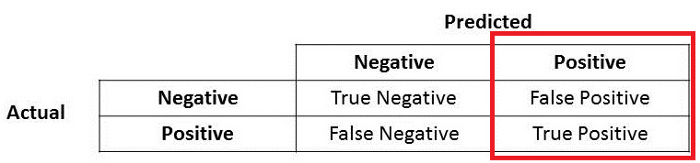
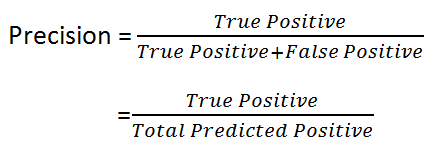


**Recall**

---
* Recall이 나타내는 것은 실제 긍정적인 정답 중에서 얼마나 정확한지를 나타내는 지표입니다. 
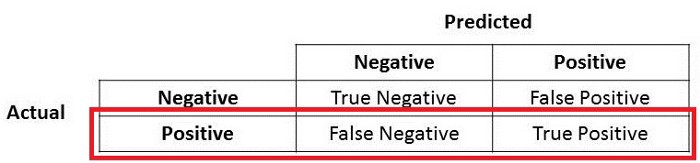
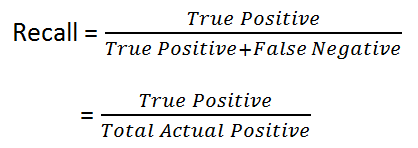


**f1-score**

---
* f1-score는 precision과 recall의 균형을 이루는 지표를 나타내고 싶을 때 사용합니다. 
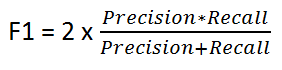

---
- 숫자의 분류하는 모델의 평가하기 위해서는 돈과 관련된 계좌 또는 중대한 문제라면 precision 지표로 모델이 맞다고 생각하는 것들은 모두 결과로 나태내야 한다고 생각합니다. 
- 하지만, 돈이 관련되어 있는 중대한 문제가 아니라면 f1-score로 precision과 recall의 평균적인 지표로 모델을 평가해도 좋다고 생각합니다. 
- 학습시킨 5개의 모델 중에서는 precision과 f1-score를 통틀어서 **SVM 모델**이 가장 좋은 결과를 보여주었습니다. 
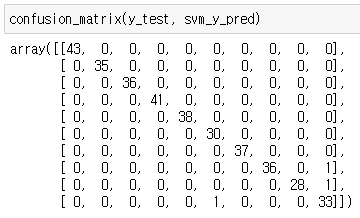
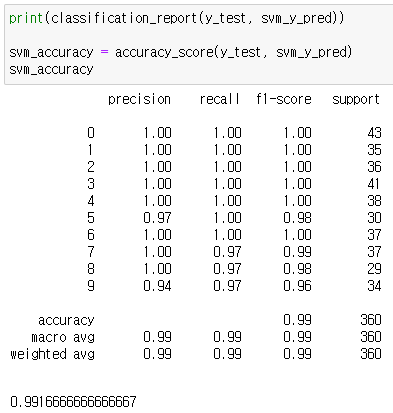

https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

# 2.2 load_wine : 와인을 분류해 봅시다

## 목차

> <p style="font-size:17px">2-2-1. 필요한 모듈 import하기</p>
  <p style="font-size:17px">2-2-2. 데이터 준비</p> 
  <p style="font-size:17px">2-2-3. 데이터 이해하기</p>
  <p style="font-size:17px">2-2-4. train, test 데이터 분리</p>
  <p style="font-size:17px">2-2-5. 다양한 모델로 학습시켜보기</p>
  <p style="font-size:17px">2-2-6. 모델을 평가해 보기</p>


## 루브릭 (프로젝트 평가 기준)

> |<p style="font-size:15px"> 평가문항 </p>                                |<p style="font-size:15px"> 상세기준 </p>        |
  |------------------------------------------------------------------------|------------------------------------------------|
  | 1. 3가지 데이터셋의 구성이 합리적으로 진행되었는가?                  |feature와 label 선정을 위한 데이터 분석과정이 체계적으로 전개됨|
  | 2. 3가지 데이터셋에 대해 각각 5가지 모델을 성공적으로 적용하였는가?    |모델학습 및 테스트가 정상적으로 수행되었음      |
  | 3. 3가지 데이터셋에 대해 모델의 평가지표가 적절히 선택되었는가?        |평가지표 선택 및 이유 설명이 타당함             |

# 2-2-1. 필요한 모듈 import 하기
---
* scikit-learn 라이브러리의 dataset 패키지 안에 있는 load_wine을 import 해옵니다.
* pandas 모듈을 임포트하여 wine 데이터 정보를 확인하는데 사용하겠습니다. 
* 이 외의 다른 모듈들은 laod_digits()에서 사용했던 그대로 사용하겠습니다. 

In [28]:
from sklearn.datasets import load_wine
import pandas as pd

## 2-2-2. 데이터 준비
---
* load_wine()를 wine라는 변수에 지정하여 로딩합니다.

In [29]:
wine = load_wine()

print(dir(wine))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


## 2-2-3. 데이터 이해하기
---
* wine에 담겨있는 정보들을 확인하기 위해 keys()라는 메서드를 사용합니다.

In [30]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

* 중요한 wine 데이터는 wine_data 변수에 저장한 후 데이터 크기를 확인합니다.
    * 총 178개의 데이터가 각각 13개의 와인 관련 정보를을 담고 있는 것으로 보입니다. 

In [31]:
wine_data = wine.data
print(wine_data.shape)

(178, 13)


* 첫 번째 데이터를 확인 해보겠습니다.

In [32]:
wine_data[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

* pandas 모듈을 사용하여 데이터 형태를 확인 하겠습니다. 
    * 위에서 말했던 것과 같이 총 178개의 와인 데이터가 있으며, 각각 13개의 특징들을 갖고있는 것을 확인 할 수 있습니다. 

In [33]:
pd.DataFrame (data = wine_data, columns = wine.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


* 이번에는 타겟 데이터를  wine_label 변수에 저장한 후 데이터 크기를 확인하고, 데이터를 확인 해보겠습니다.
    * 178개의 와인 데이터가 3가지의 와인으로 라벨에 따라 분류되어 있는 것을 확인 할 수 있습니다. 

In [34]:
wine_label = wine.target
print(wine_label.shape)
wine_label[:]

(178,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

* 라벨의 이름을 다음과 같은 target_names에서 확인 해보겠습니다.

In [35]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [36]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

* sklearn 사이트에 나와있는 공식 가이드 문서도 함께 살펴보겠습니다. 
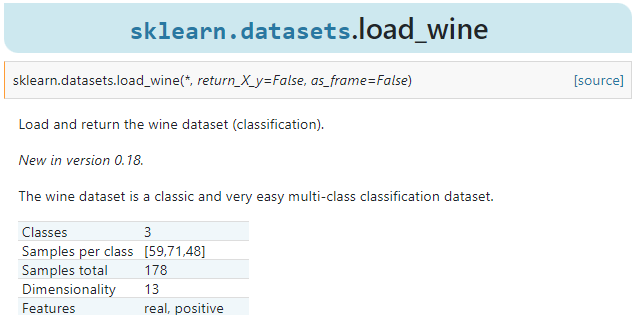
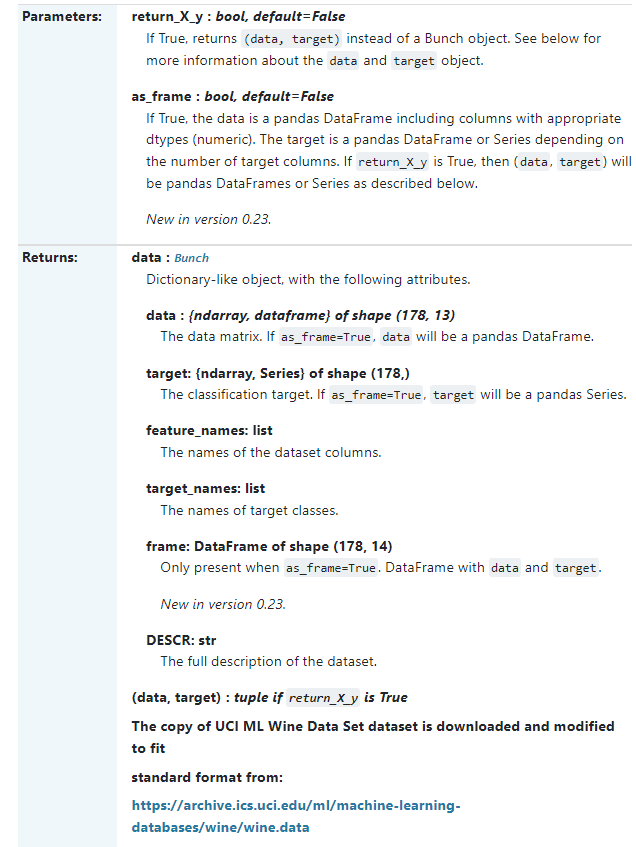
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html?highlight=load_wine#sklearn.datasets.load_wine

## 2-2-4. train, test 데이터 분리
---
* 학습 데이터와 레이블의 크기가 같은지 다시한번 확인합니다.
* 모델 학습을 위한 데이터와 테스트용 정답 데이터를 준비 해보겠습니다.
* 모델 학습 데이터와 테스트용 데이터를 8:2 비율로 나눠주겠습니다.
* random_state는 2란 숫자를 줘서 나눠지는 데이터를 고정 시켜주겠습니다. 

In [37]:
# 학습 데이터와 레이블의 크기가 같은지 다시한번 확인합니다.
print ('wine_data: ', wine_data.shape)
print ('wine_label: ', wine_label.shape)

wine_data:  (178, 13)
wine_label:  (178,)


In [38]:
'''
* 모델 학습 데이터와 테스트용 데이터를 8:2 비율로 나눠주겠습니다.
* random_state는 2이란 숫자를 줘서 나눠지는 데이터를 고정 시켜주겠습니다. 
'''
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=2)

# 학습데이터와 테스트데이터 수를 비교해봅니다. 
print('X_train 데이터 수: ', len(X_train))
print('X_test 데이터 수: ', len(X_test))

X_train 데이터 수:  142
X_test 데이터 수:  36


## 2-2-5. 다양한 모델로 학습시켜보기
---
* Decision Tree 사용해 보기
* Random Forest 사용해 보기
* SVM 사용해 보기
* SGD Classifier 사용해 보기
* Logistic Regression 사용해 보기

### Decision Tree
---

In [39]:
decision_tree = DecisionTreeClassifier(random_state=2)
decision_tree.fit(X_train, y_train)
decision_y_pred = decision_tree.predict(X_test)

In [40]:
# confusion_matrix로 decision tree 예측결과 확인
confusion_matrix(y_test, decision_y_pred)

array([[16,  2,  0],
       [ 0,  9,  0],
       [ 0,  0,  9]])

In [41]:
# classification report로 decision tree 모델 성능평가
print(classification_report(y_test, decision_y_pred))

decision_accuracy = accuracy_score(y_test, decision_y_pred)
decision_accuracy

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.82      1.00      0.90         9
           2       1.00      1.00      1.00         9

    accuracy                           0.94        36
   macro avg       0.94      0.96      0.95        36
weighted avg       0.95      0.94      0.95        36



0.9444444444444444

#### Decision Tree 결과

> Decision Tree accuracy = **94%**

**Confusion Matrix**
* class_1만 2개의 오답을 보여주고 있고, 나머지는 정답을 보여주고 있습니다.  

**Classification Report**
* class_1만 평균 precision 값 보다 낮은 값을 보이고 있고, 나머지는 100%를 보이고 있습니다. 
* class_0만 평균 recall 값 보다 낮은 값을 보이고 있고, 나머지는 100%를 보이고 있습니다. 
* class_1만 평균 f1-score 값 보다 낮은 값을 보이고 있습니다. 

### Random Forest
---

In [42]:
random_forest = RandomForestClassifier(random_state=2)
random_forest.fit(X_train, y_train)
random_y_pred = random_forest.predict(X_test)

In [43]:
confusion_matrix(y_test, random_y_pred)

array([[18,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  9]])

In [44]:
print(classification_report(y_test, random_y_pred))

random_accuracy = accuracy_score(y_test, random_y_pred)
random_accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



1.0

#### Random Forest 결과

> Random Forest accuracy = **100%**

**Confusion Matrix**
* 모든 와인 종류가 100%의 결과를 보여주고 있습니다. 

**Classification Report**
* precision, recall 그리고 f1-score 모두 100%의 결과를 보여주고 있습니다. 

### SVM
---

In [45]:
svm_model = svm.SVC(random_state=2)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

In [46]:
confusion_matrix(y_test, svm_y_pred)

array([[16,  0,  2],
       [ 0,  9,  0],
       [ 1,  8,  0]])

In [47]:
print(classification_report(y_test, svm_y_pred))

svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_accuracy

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.53      1.00      0.69         9
           2       0.00      0.00      0.00         9

    accuracy                           0.69        36
   macro avg       0.49      0.63      0.54        36
weighted avg       0.60      0.69      0.63        36



0.6944444444444444

#### SVM 결과

> SVM accuracy = **69%**

**Confusion Matrix**
* class_0은 하나의 오답의 결과를 나타냈지만, class_1은 많은 오류의 결과를 그리고 class_2는 정답을 하나도 맞추지 못했습니다. 

**Classification Report**
* class_0만 평균 precision 값 보다 높은 값을 보이고 있고, 나머지는 좋지 않은 결과를 보이고 있습니다. 
* class_0과 class_1은 평균 recall 값 보다 높은 값을 보이고 있고, class_2는 0%를 보이고 있습니다. 
* class_0과 class-1은 평균 f1-score 값 보다 같거나 높은 값을 보이고 있고, class_2는 0%를 보이고 있습니다. 

### SGD (Stochastic Gradient Descent) Classifier
---

In [48]:
sgd_model = SGDClassifier(random_state=2)
sgd_model.fit(X_train, y_train)
sgd_y_pred = sgd_model.predict(X_test)

In [49]:
confusion_matrix(y_test, sgd_y_pred)

array([[15,  0,  3],
       [ 0,  8,  1],
       [ 0,  5,  4]])

In [50]:
print(classification_report(y_test, sgd_y_pred))

sgd_accuracy = accuracy_score(y_test, sgd_y_pred)
sgd_accuracy


              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       0.62      0.89      0.73         9
           2       0.50      0.44      0.47         9

    accuracy                           0.75        36
   macro avg       0.71      0.72      0.70        36
weighted avg       0.78      0.75      0.75        36



0.75

#### SGD 결과

> SGD accuracy = **75%**

**Confusion Matrix**
* class_0은 모두 정답을 맞췄지만, 나머지는 평균 4~5개의 오답을 보이고 있습니다. 

**Classification Report**
* class_0만 평균 precision 값 보다 높은 값을 보이고 있고, 나머지는 낮은 값을 보이고 있습니다. 
* class_0과 class_1은 평균 recall 값 보다 높은 값을 보이고 있고, class_2는 낮은 값을 보이고 있습니다. 
* class_0은 평균 f1-score 값 보다 높은 값을 보이고 있고, 나머지는 낮은 값을 보이고 있습니다. 

### Logistic Regression
---

In [51]:
logistic_model = LogisticRegression(random_state=2)
logistic_model.fit(X_train, y_train)
logistic_y_pred = logistic_model.predict(X_test)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
confusion_matrix(y_test, logistic_y_pred)

array([[16,  2,  0],
       [ 0,  9,  0],
       [ 0,  1,  8]])

In [53]:
print(classification_report(y_test, logistic_y_pred))

logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
logistic_accuracy

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.75      1.00      0.86         9
           2       1.00      0.89      0.94         9

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.91        36
weighted avg       0.94      0.92      0.92        36



0.9166666666666666

#### Logistic Regression 결과

> Logistic Regression accuracy = **92%**

**Confusion Matrix**
* class_0과 class_2는 모두 정답을 맞췄고, class_1은 3개의 오답을 보이고 있습니다. 

**Classification Report**
* class_1을 제외하고 100%의 precision을 보이고 있습니다. 
* class_1만 100%로 평균 recall 값 보다 높은 값을 보이고 있습니다.
* class_0과 class_1만 평균 f1-score 값 보다 높은 값을 보이고 있습니다.

## 2-1-6. 모델을 평가해 보기

**Accuracies:**
> Decision Tree accuracy = **94%**<br>
> Random Forest accuracy = **100%**<br>
> SVM accuracy = **69%**<br>
> SGD accuracy = **75%**<br>
> Logistic Regression accuracy = **92%**<br>


**Precision**
___
* Precision이 나타내는 것은 모델이 예측은 진행해서 나온 positive 결과 중에서만 얼마나 정확한지를 나타내는 지표입니다. 
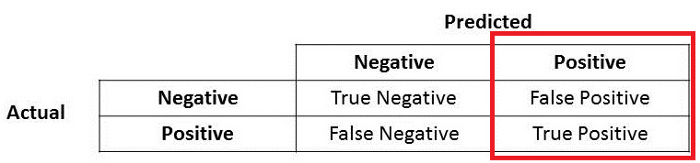
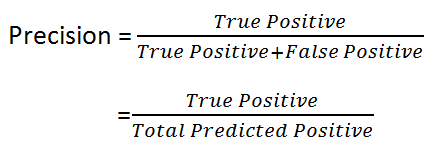]


**Recall**

---
* Recall이 나타내는 것은 실제 긍정적인 정답 중에서 얼마나 정확한지를 나타내는 지표입니다. 
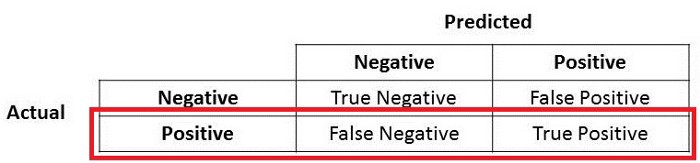
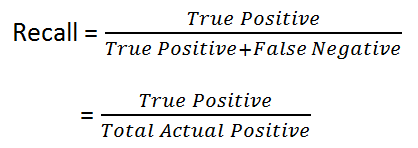


**f1-score**

---
* f1-score는 precision과 recall의 균형을 이루는 지표를 나타내고 싶을 때 사용합니다. 
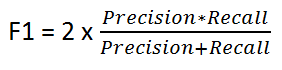

---
- 와인을 분류하는 모델을 평가하기 위해서는 precision의 지표로 모델의 성능을 확인해도 되는 문제라고 생각됩니다. 목적 자체가 class_0, 1 또는 2의 와인으로 분류하는 것이고 분류가 되는것이 중요하지, 맞추지 못한다고 해서 큰일이 나는 문제가 아니기 때문입니다. (스팸메일 분류 문제와 비슷하다고 생각됩니다.)
- 비슷한 액체류 분류에 있어서, 물약을 분류하는 모델을 평가한다면 precision이나 f1-score보다는 recall에 중점을 뒀을 것 같습니다. 사람에게 사용되는 약은 와인을 분류하는 것보다는 훨씬 중대한 문제이기 때문입니다. 
- 학습시킨 5개의 모델 중에서는 precision, f1-score과 recall을 통틀어서 **Random Forest 모델**이 모든 지표에서 100%로 가장 좋은 결과를 보여주었습니다. 
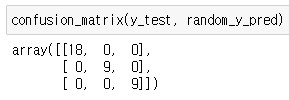
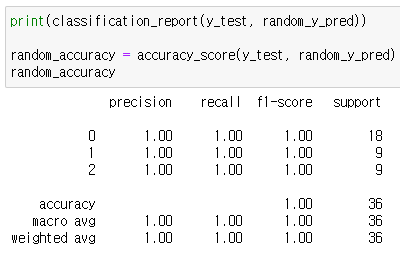
https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9


# 2.3 load_breast_cancer : 유방암 여부를 진단해 봅시다

## 목차

> <p style="font-size:17px">2-3-1. 필요한 모듈 import하기</p>
  <p style="font-size:17px">2-3-2. 데이터 준비</p> 
  <p style="font-size:17px">2-3-3. 데이터 이해하기</p>
  <p style="font-size:17px">2-3-4. train, test 데이터 분리</p>
  <p style="font-size:17px">2-3-5. 다양한 모델로 학습시켜보기</p>
  <p style="font-size:17px">2-3-6. 모델을 평가해 보기</p>


## 루브릭 (프로젝트 평가 기준)

> |<p style="font-size:15px"> 평가문항 </p>                                |<p style="font-size:15px"> 상세기준 </p>        |
  |------------------------------------------------------------------------|------------------------------------------------|
  | 1. 3가지 데이터셋의 구성이 합리적으로 진행되었는가?                  |feature와 label 선정을 위한 데이터 분석과정이 체계적으로 전개됨|
  | 2. 3가지 데이터셋에 대해 각각 5가지 모델을 성공적으로 적용하였는가?    |모델학습 및 테스트가 정상적으로 수행되었음      |
  | 3. 3가지 데이터셋에 대해 모델의 평가지표가 적절히 선택되었는가?        |평가지표 선택 및 이유 설명이 타당함             |

# 2-3-1. 필요한 모듈 import 하기
---
* scikit-learn 라이브러리의 dataset 패키지 안에 있는 load_breast_cancer을 import 해옵니다.
* 이 외의 다른 모듈들은 laod_digits()에서 사용했던 그대로 사용하겠습니다. 

In [54]:
from sklearn.datasets import load_breast_cancer

## 2-3-2. 데이터 준비
---
* load_breast_cancer()를 breast_cancer라는 변수에 지정하여 로딩합니다.

In [55]:
breast_cancer = load_breast_cancer()

print(dir(breast_cancer))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


## 2-3-3. 데이터 이해하기
---
* breast_cancer에 담겨있는 정보들을 확인하기 위해 keys()라는 메서드를 사용합니다.

In [56]:
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

* 중요한 breast_cancer 데이터는 breast_cancer_data 변수에 저장한 후 데이터 크기를 확인합니다.
    * 총 569개의 데이터가 각각 30개의 유방암 관련 특징 정보를을 담고 있는 것으로 보입니다. 

In [57]:
breast_cancer_data = breast_cancer.data
print(breast_cancer_data.shape)

(569, 30)


* 첫 번째 데이터를 확인 해보겠습니다.

In [58]:
breast_cancer_data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

* pandas 모듈을 사용하여 데이터 형태를 확인 하겠습니다. 
    * 위에서 말했던 것과 같이 총 569개의 유방암 데이터가 있으며, 각각 30개의 특징들을 갖고있는 것을 확인 할 수 있습니다. 


In [59]:
pd.DataFrame (data = breast_cancer_data, columns = breast_cancer.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


* 이번에는 타겟 데이터를  breast_cancer_label 변수에 저장한 후 데이터 크기를 확인하고, 데이터를 확인 해보겠습니다.
    * 569개의 유방암 데이터가 2가지(악성 또는 양성)의 라벨에 따라 분류되어 있는 것을 확인 할 수 있습니다. 


In [60]:
breast_cancer_label = breast_cancer.target
print(breast_cancer_label.shape)
breast_cancer_label[:]

(569,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

* 라벨의 이름을 다음과 같은 target_names에서 확인 해보겠습니다.

In [61]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [62]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

* sklearn 사이트에 나와있는 공식 가이드 문서도 함께 살펴보겠습니다. 
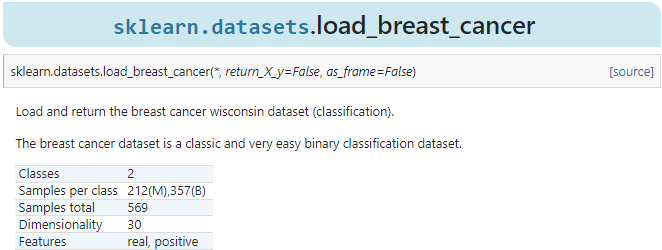
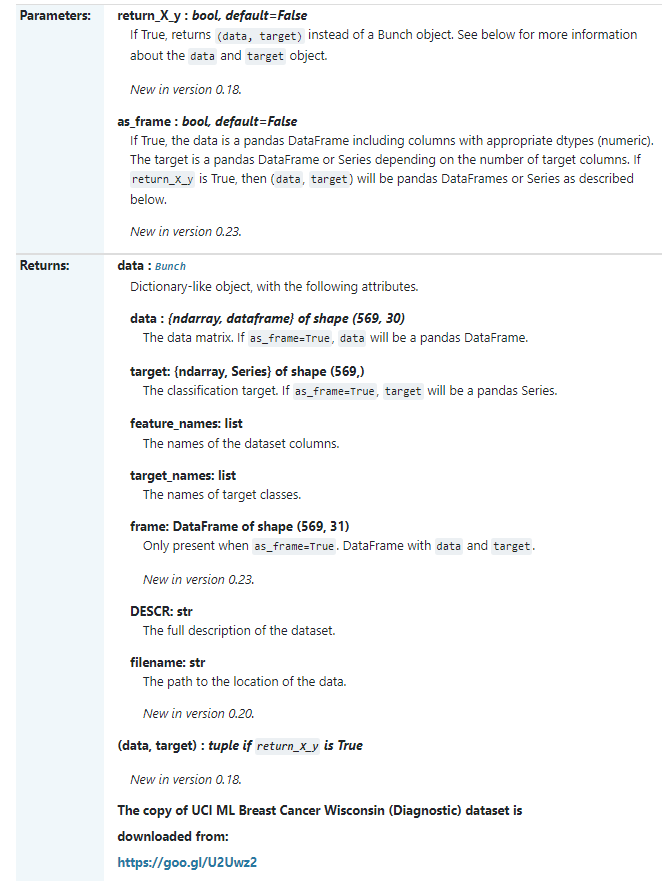
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html?highlight=load_breast_cancer#sklearn.datasets.load_breast_cancer

## 2-3-4. train, test 데이터 분리
---
* 학습 데이터와 레이블의 크기가 같은지 다시한번 확인합니다.
* 모델 학습을 위한 데이터와 테스트용 정답 데이터를 준비 해보겠습니다.
* 모델 학습 데이터와 테스트용 데이터를 8:2 비율로 나눠주겠습니다.
* random_state는 3란 숫자를 줘서 나눠지는 데이터를 고정 시켜주겠습니다. 

In [63]:
# 학습 데이터와 레이블의 크기가 같은지 다시한번 확인합니다.
print ('breast_cancer_data: ', breast_cancer_data.shape)
print ('breast_cancer_label: ', breast_cancer_label.shape)

breast_cancer_data:  (569, 30)
breast_cancer_label:  (569,)


In [64]:
'''
* 모델 학습 데이터와 테스트용 데이터를 8:2 비율로 나눠주겠습니다.
* random_state는 2이란 숫자를 줘서 나눠지는 데이터를 고정 시켜주겠습니다. 
'''
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=3)

# 학습데이터와 테스트데이터 수를 비교해봅니다. 
print('X_train 데이터 수: ', len(X_train))
print('X_test 데이터 수: ', len(X_test))

X_train 데이터 수:  455
X_test 데이터 수:  114


## 2-3-5. 다양한 모델로 학습시켜보기
---
* Decision Tree 사용해 보기
* Random Forest 사용해 보기
* SVM 사용해 보기
* SGD Classifier 사용해 보기
* Logistic Regression 사용해 보기


### Decision Tree
---

In [65]:
decision_tree = DecisionTreeClassifier(random_state=3)
decision_tree.fit(X_train, y_train)
decision_y_pred = decision_tree.predict(X_test)

In [66]:
# confusion_matrix로 decision tree 예측결과 확인
confusion_matrix(y_test, decision_y_pred)

array([[35,  5],
       [ 7, 67]])

In [67]:
# classification report로 decision tree 모델 성능평가
print(classification_report(y_test, decision_y_pred))

decision_accuracy = accuracy_score(y_test, decision_y_pred)
decision_accuracy

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        40
           1       0.93      0.91      0.92        74

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.89       114
weighted avg       0.90      0.89      0.90       114



0.8947368421052632

#### Decision Tree 결과

> Decision Tree accuracy = **89%**

**Confusion Matrix**
* 악성종양(malignant)은 7개의 오답을 그리고 양성종양(benign)은 5개의 오답 결과를 보여주고 있습니다.

**Classification Report**
* 양성종양(benign)만 평균 precision 값 보다 높은 값을 보이고 있습니다. 
* 양성종양(benign)만 평균 recall 값 보다 높은 값을 보이고 있습니다. 
* 양성종양(benign)만 평균 f1-score 값 보다 높은 값을 보이고 있습니다. 

### Random Forest
---

In [68]:
random_forest = RandomForestClassifier(random_state=3)
random_forest.fit(X_train, y_train)
random_y_pred = random_forest.predict(X_test)

In [69]:
confusion_matrix(y_test, random_y_pred)

array([[37,  3],
       [ 4, 70]])

In [70]:
print(classification_report(y_test, random_y_pred))

random_accuracy = accuracy_score(y_test, random_y_pred)
random_accuracy

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        40
           1       0.96      0.95      0.95        74

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



0.9385964912280702

#### Random Forest 결과

> Random Forest accuracy = **93%**

**Confusion Matrix**
* 악성종양(malignant)은 4개의 오답을 그리고 양성종양(benign)은 3개의 오답 결과를 보여주고 있습니다.

**Classification Report**
* 양성종양(benign)만 평균 precision 값 보다 높은 값을 보이고 있습니다. 
* 양성종양(benign)만 평균 recall 값 보다 높은 값을 보이고 있습니다. 
* 양성종양(benign)만 평균 f1-score 값 보다 높은 값을 보이고 있습니다. 

### SVM
---

In [71]:
svm_model = svm.SVC(random_state=3)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

In [72]:
confusion_matrix(y_test, svm_y_pred)

array([[32,  8],
       [ 2, 72]])

In [73]:
print(classification_report(y_test, svm_y_pred))

svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_accuracy

              precision    recall  f1-score   support

           0       0.94      0.80      0.86        40
           1       0.90      0.97      0.94        74

    accuracy                           0.91       114
   macro avg       0.92      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



0.9122807017543859

#### SVM 결과

> SVM accuracy = **91%**

**Confusion Matrix**
* 악성종양(malignant)은 2개의 오답을 그리고 양성종양(benign)은 8개의 오답 결과를 보여주고 있습니다.

**Classification Report**
* 악성종양(malignant)만 평균 precision 값 보다 높은 값을 보이고 있습니다. 
* 양성종양(benign)만 평균 recall 값 보다 높은 값을 보이고 있습니다. 
* 양성종양(benign)만 평균 f1-score 값 보다 높은 값을 보이고 있습니다. 

### SGD (Stochastic Gradient Descent) Classifier
---

In [74]:
sgd_model = SGDClassifier(random_state=3)
sgd_model.fit(X_train, y_train)
sgd_y_pred = sgd_model.predict(X_test)

In [75]:
confusion_matrix(y_test, sgd_y_pred)

array([[31,  9],
       [ 1, 73]])

In [76]:
print(classification_report(y_test, sgd_y_pred))

sgd_accuracy = accuracy_score(y_test, sgd_y_pred)
sgd_accuracy


              precision    recall  f1-score   support

           0       0.97      0.78      0.86        40
           1       0.89      0.99      0.94        74

    accuracy                           0.91       114
   macro avg       0.93      0.88      0.90       114
weighted avg       0.92      0.91      0.91       114



0.9122807017543859

#### SGD 결과

> SGD accuracy = **91%**

**Confusion Matrix**
* 악성종양(malignant)은 1개의 오답을 그리고 양성종양(benign)은 9개의 오답 결과를 보여주고 있습니다.

**Classification Report**
* 악성종양(malignant)만 평균 precision 값 보다 높은 값을 보이고 있습니다. 
* 양성종양(benign)만 평균 recall 값 보다 높은 값을 보이고 있습니다. 
* 양성종양(benign)만 평균 f1-score 값 보다 높은 값을 보이고 있습니다. 

### Logistic Regression
---

In [77]:
logistic_model = LogisticRegression(random_state=3)
logistic_model.fit(X_train, y_train)
logistic_y_pred = logistic_model.predict(X_test)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
confusion_matrix(y_test, logistic_y_pred)

array([[34,  6],
       [ 4, 70]])

In [79]:
print(classification_report(y_test, logistic_y_pred))

logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
logistic_accuracy


              precision    recall  f1-score   support

           0       0.89      0.85      0.87        40
           1       0.92      0.95      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



0.9122807017543859

#### Logistic Regression 결과

> Logistic Regression accuracy = **91%**

**Confusion Matrix**
* 악성종양(malignant)은 4개의 오답을 그리고 양성종양(benign)은 6개의 오답 결과를 보여주고 있습니다.

**Classification Report**
* 양성종양(benign)만 평균 precision 값 보다 높은 값을 보이고 있습니다. 
* 양성종양(benign)만 평균 recall 값 보다 높은 값을 보이고 있습니다. 
* 양성종양(benign)만 평균 f1-score 값 보다 높은 값을 보이고 있습니다. 

## 2-1-6. 모델을 평가해 보기

**Accuracies:**
> Decision Tree accuracy = **89%**<br>
> Random Forest accuracy = **93%**<br>
> SVM accuracy = **91**<br>
> SGD accuracy = **91%**<br>
> Logistic Regression accuracy = **91%**<br>


**Precision**
___
* Precision이 나타내는 것은 모델이 예측은 진행해서 나온 positive 결과 중에서만 얼마나 정확한지를 나타내는 지표입니다. 
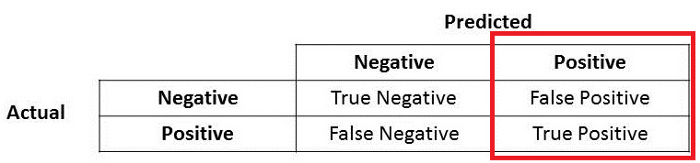
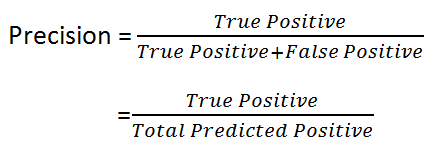


**Recall**

---
* Recall이 나타내는 것은 실제 긍정적인 정답 중에서 얼마나 정확한지를 나타내는 지표입니다. 
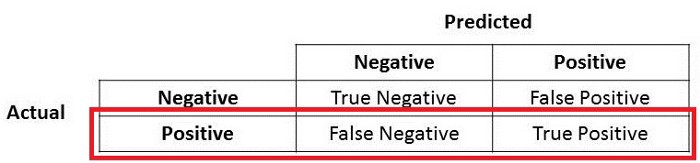
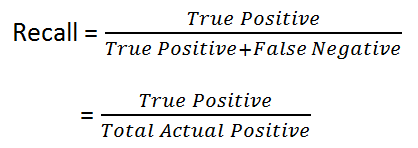


**f1-score**

---
* f1-score는 precision과 recall의 균형을 이루는 지표를 나타내고 싶을 때 사용합니다. 
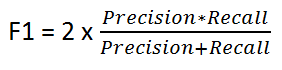

---
- 숫자와 와인을 분류하는 모델과는 다르게 유방암을 분류하는 모델을 평가하기 위해서는 절대적으로 recall을 지표로 사용해야 한다고 생각합니다. 실제 암이 있는데도 모델이 없다고 평가를 해서 집으로 돌아가는 일이 없어야 하기 때문입니다. 차라리 악성종양이 아닌데 잘못 판단해서 다시한번 검사 받게 되는 일이 나을 것입니다. 
- recall 값들을 들여다본 결과, 거의 비슷한 결과를 나타내고 있습니다. 
> Decision Tree recall = **89%**<br>
> Random Forest recall = **94%**<br>
> SVM recall = **91%**<br>
> SGD recall = **91%**<br>
> Logistic Regression recall = **91%**<br>
    - 따라서 악성종양과 양성종양 각각의 recall 값을 비교하게 되었습니다. 
        > Decision Tree recall = 악성종양 (**88%**) / 양성종양 (**91%**)<br>
        > Random Forest recall = 악성종양 (**93%**) / 양성종양 (**95%**)<br>
        > SVM recall = 악성종양 (**80%**) / 양성종양 (**97%**)<br>
        > SGD recall = 악성종양 (**78%**) / 양성종양 (**99%**)<br>
        > Logistic Regression recall = 악성종양 (**85%**) / 양성종양 (**95%**)<br>
- 악성종양과 양성종양 각각의 recall 값을 비교해본 결과, Random Forest 모델을 사용한 악성종양의 recall 값이 93%로 가장 높았고, SGD 모델을 사용한 양성종양의 recall 값이 99%로 가장 높았습니다. 
    - 그래도 양성종양 보다는 악성종양을 매번 찾아낼 수 있는 것이 더 중요하기 때문에 악성종양의 recall 값이 높은 **Random Forest 모델**을 사용하는 것이 가장 좋을 것 같습니다. 
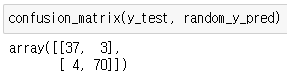
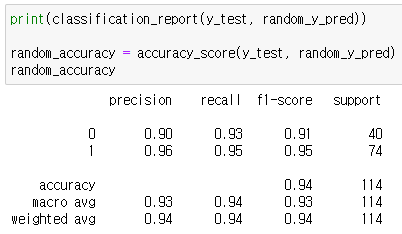
https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9


## train_test_split( ... ,random_state = *int*)
---
> **train_test_split 에서 random_state라는 parameter가 있는데, 정확이 이것이 무슨 역할을 하는지 궁금증이 있었습니다.**
    
    
   - [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)에서 읽어보니 train_test_split을 사용한다면 사용할 때마다 매번 random한 80%, 20% 데이터를 추출합니다. 따라서, 매번 추출되는 80%, 20%데이터를 고정 시키기 위해서 random_state에 integer 숫자를 지정하여 사용하게 된다는 것을 알게 되었습니다. 